In [1]:
import scanpy as sc #import scanpy
import pandas as pd #pandas 
import numpy as np #import numpy
import pcreode #import pcreode
import matplotlib.pylab as plt #import matplotlib 
from sklearn.cluster import KMeans #import the KMeans algorithm from scikit-learn

#C:\Users\hafsa>set PATH=C:\Users\hafsa\AppData\Local\Programs\Git\cmd\;%PATH%

In [2]:
# import platform
# print(platform.architecture())
sc.set_figure_params(dpi=120) #set figure display size

In [3]:
adta_crinier = sc.read_h5ad('C:/Users/hafsa/OneDrive - Imperial College London/PhD/Public datasets/NK studies datasets/adata_crinier_post_scvi.h5ad')

C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
# preprocessing
# unsupervised feature selection
# here they use the highly_variable_genes function found in scanpy to pick the genes presenting robust
# and biologically meaningful signals
# This will halp remove inherent noise originating from stochastic gene expression

In [5]:
# pca

In [6]:
# prinicipal component subsetting
# Here, we will be processing the data using principal component analysis (PCA) and 
# selecting a cutoff representing the most informative principal components.
# The coordinates of each cell is represented in three dimensions of PCA space. 
# This is what we will pass to the density/downsampling sections of this analysis.

# I are not doing this because latent space representation is better than pcas

In [7]:
# Density calculation 

# transfer X_scvi to a numpy array
leiden_rep = adta_crinier.obsm['X_scVI'].copy()

In [8]:
# the density of each data point must be calculated

#Density class
dens = pcreode.Density(leiden_rep)

In [9]:
leiden_rep.shape

(24296, 30)

In [10]:
# radius of inclusion must be established to calculate the densities for each datapoint
# density = number of data points within a radius, where the radius is centred on the data point in question
# radius needs to be picked carefully
# too large - the range of densities will be limited
# too small - noisy data pointsa and non noisy datapoints have similar densitities

best guess starting radius = 5.808786869049072


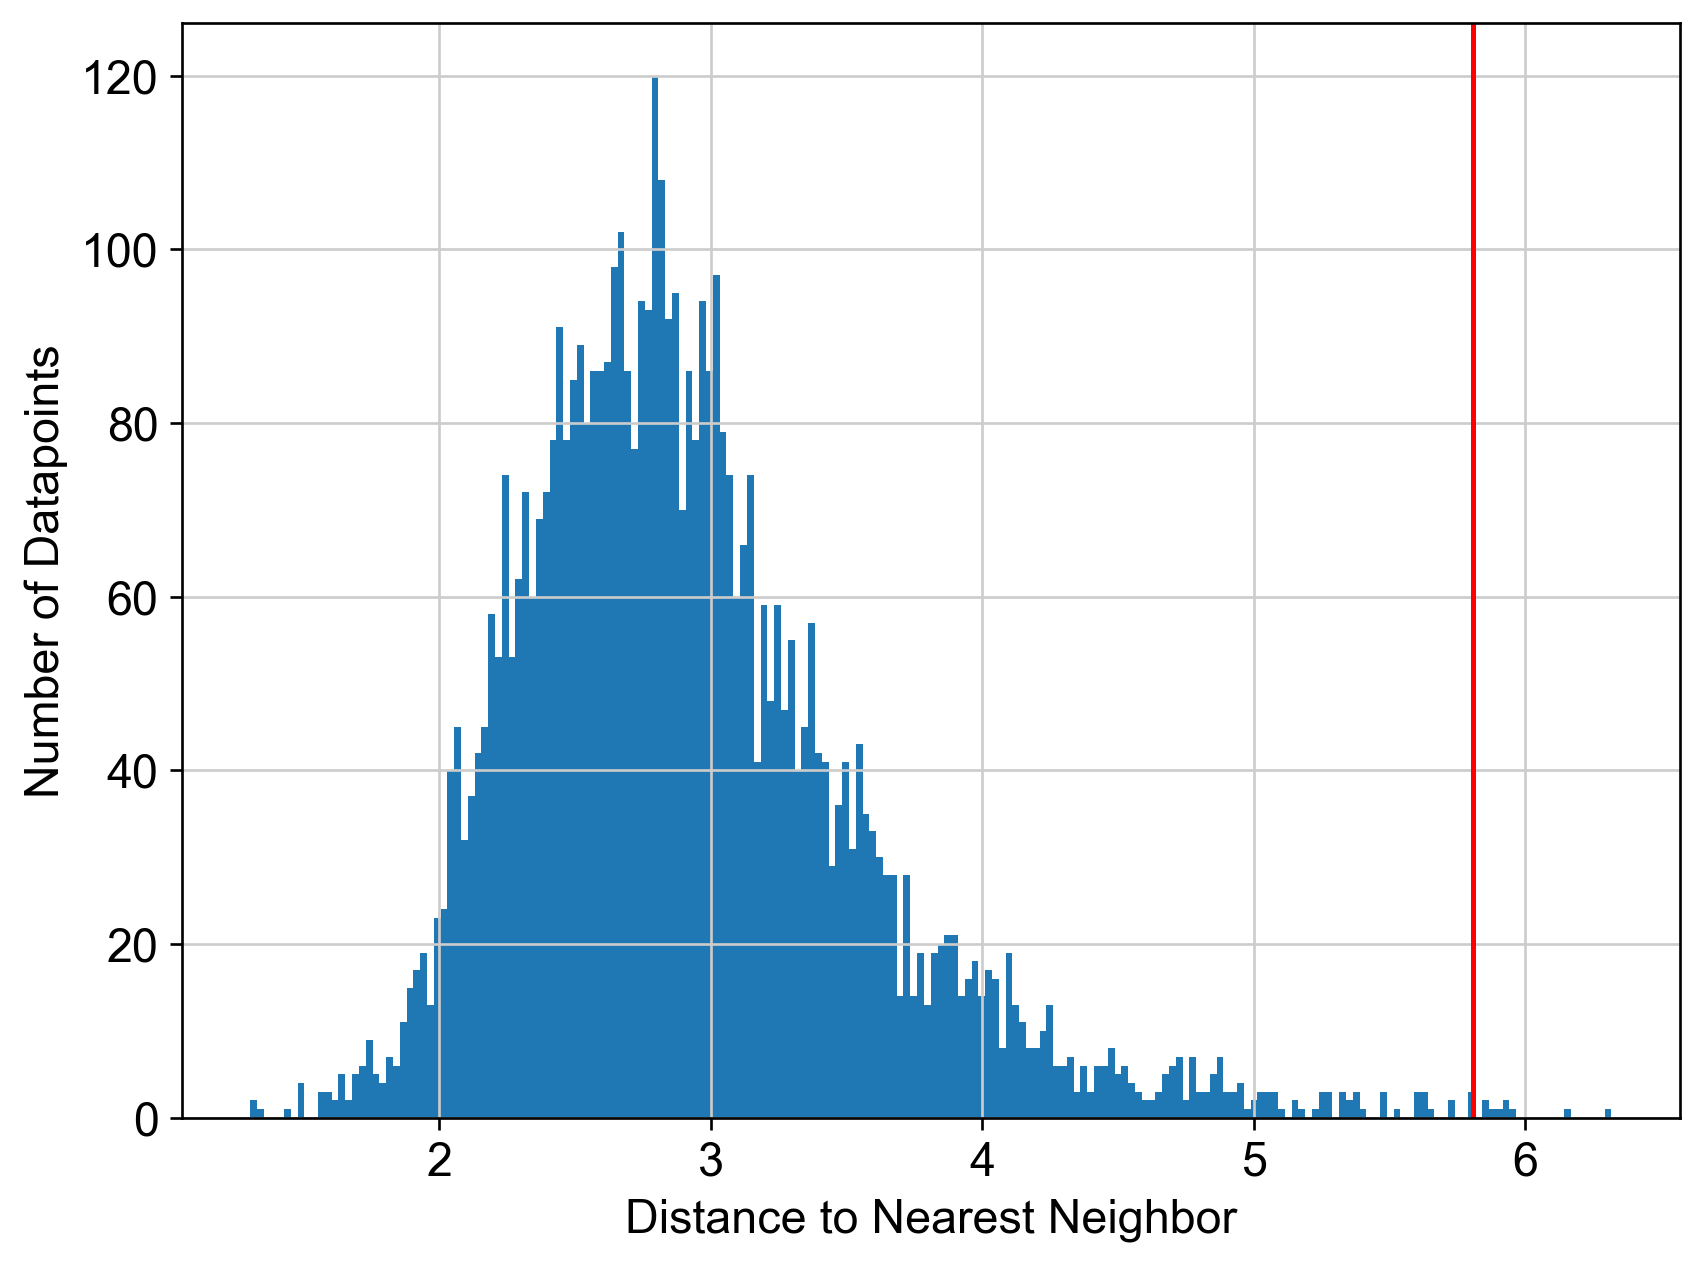

In [11]:
# to pick a good radius, we can start by comparing the distance to the nearest neighbor for 
# all data points. 

# hist of all the nearest neighbour distances 
best_guess = dens.nearest_neighbor_hist()

calculating densities for datapoints: 0 -> 4999
calculating densities for datapoints: 5000 -> 9999
calculating densities for datapoints: 10000 -> 14999
calculating densities for datapoints: 15000 -> 19999
calculating densities for datapoints: 20000 -> 24295
****Always check density overlay for radius fit****


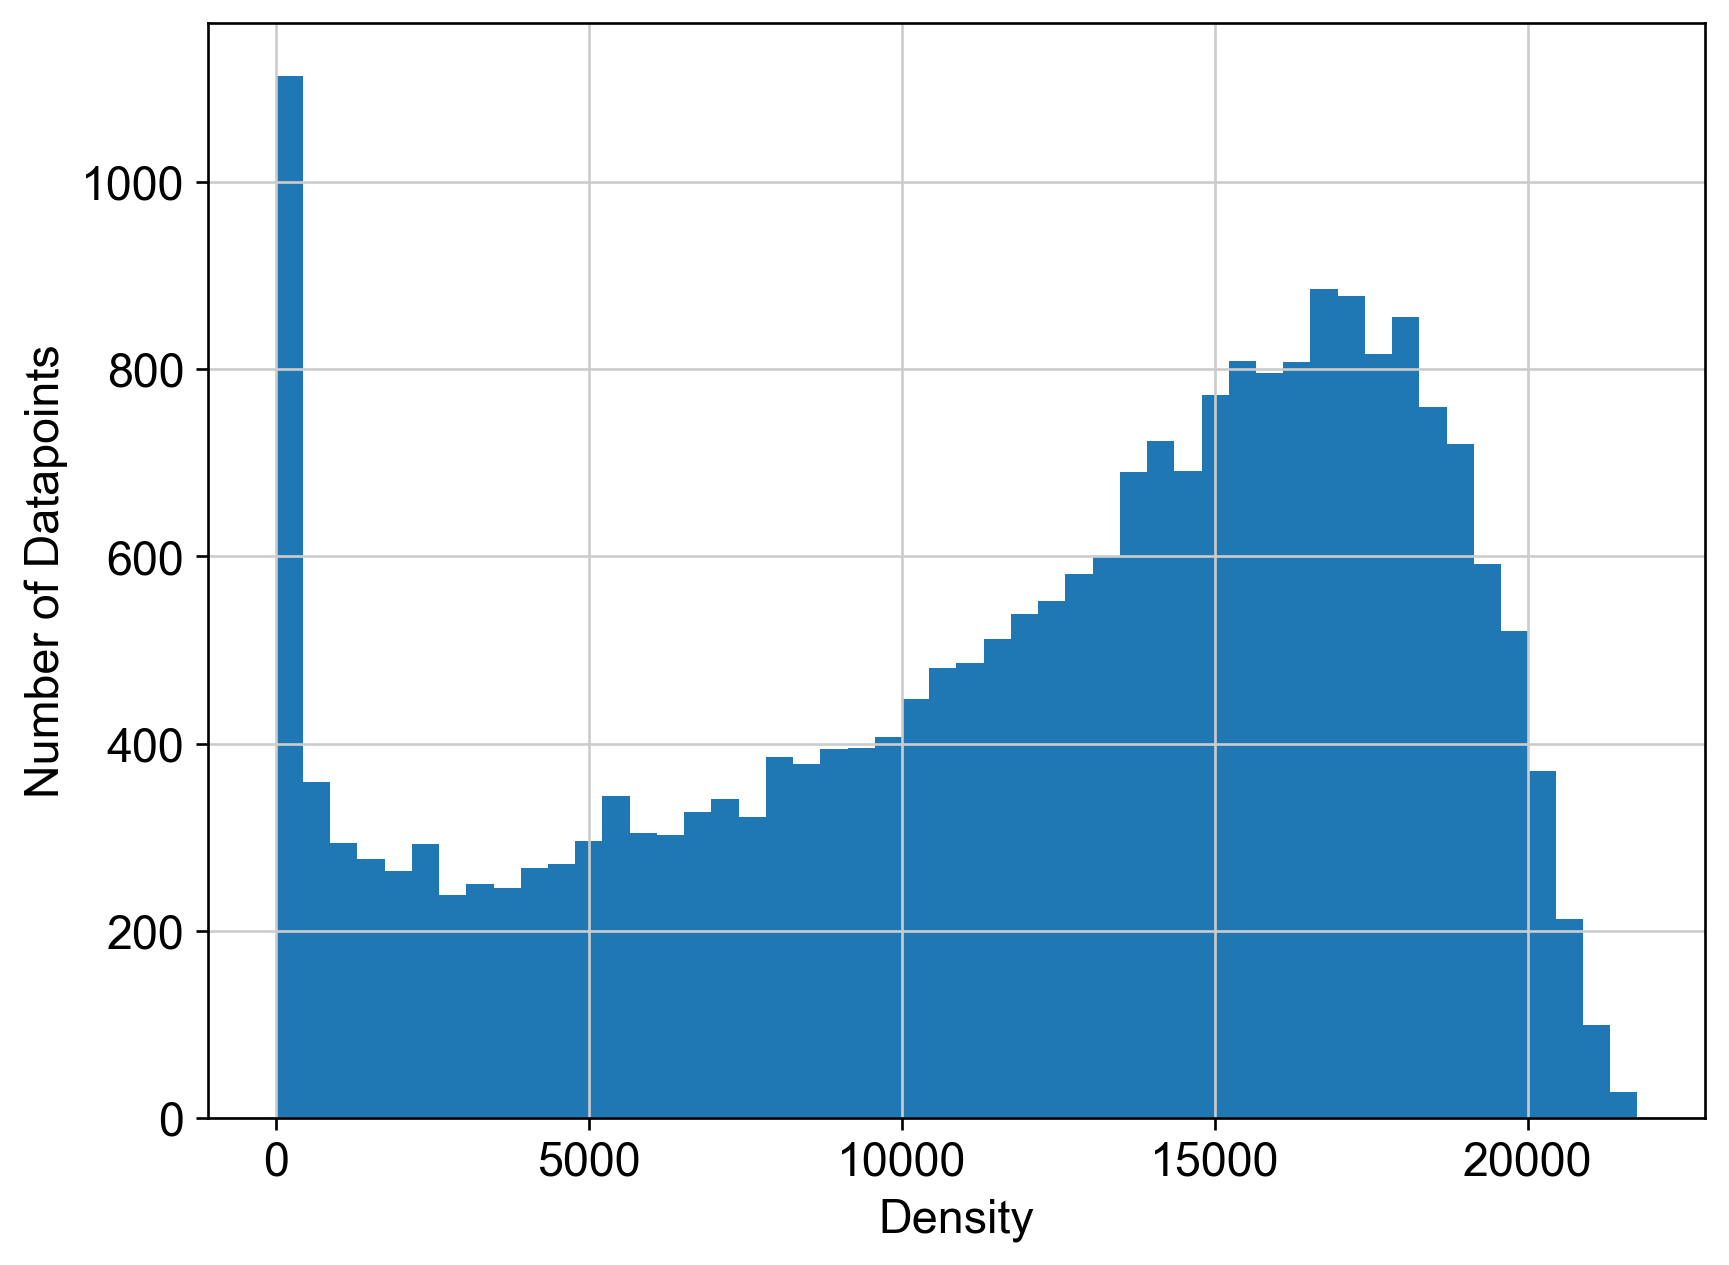

In [12]:
adta_crinier.obs['Density'] = dens.get_density( radius=5.75) #set myeloid_adata 'Density' observation
dens.density_hist( n_bins=50)

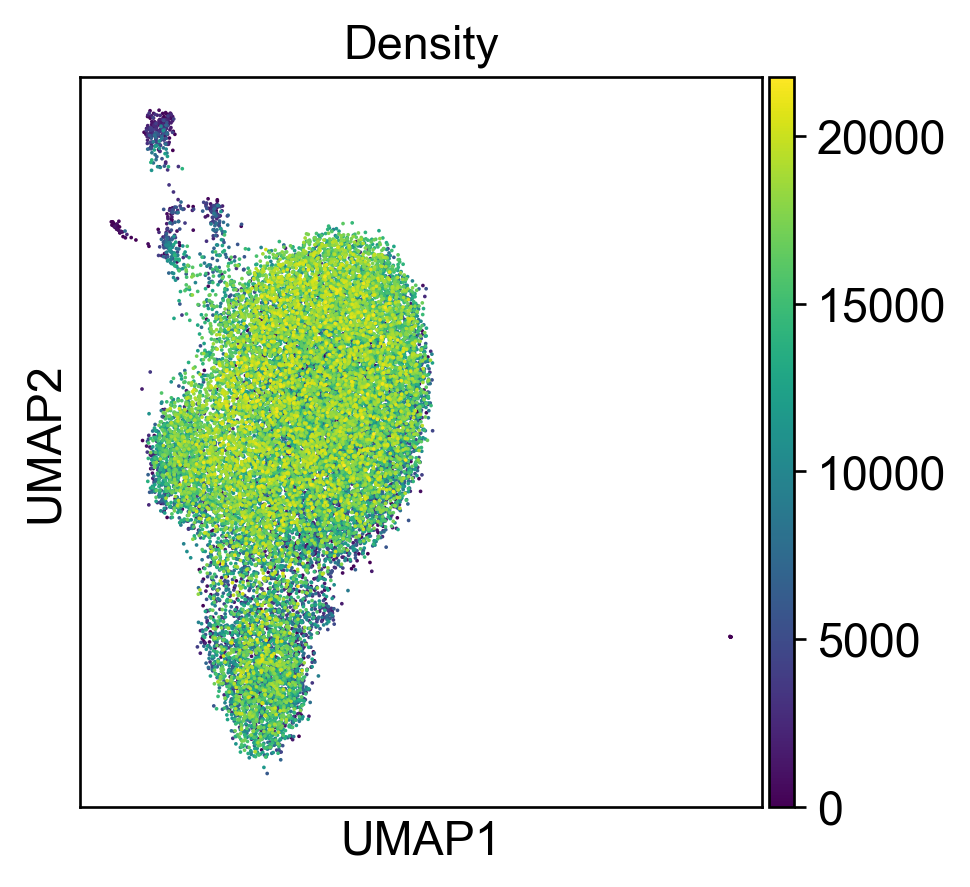

In [13]:
sc.pl.umap(adta_crinier,color = 'Density') 
#overlay each cell's Density value onto a umap
# this actually looks like almost all points have very high densities especially because they are at the centre 
# also note these are very similar cells and there are only three different cell types

calculating densities for datapoints: 0 -> 4999
calculating densities for datapoints: 5000 -> 9999
calculating densities for datapoints: 10000 -> 14999
calculating densities for datapoints: 15000 -> 19999
calculating densities for datapoints: 20000 -> 24295
****Always check density overlay for radius fit****


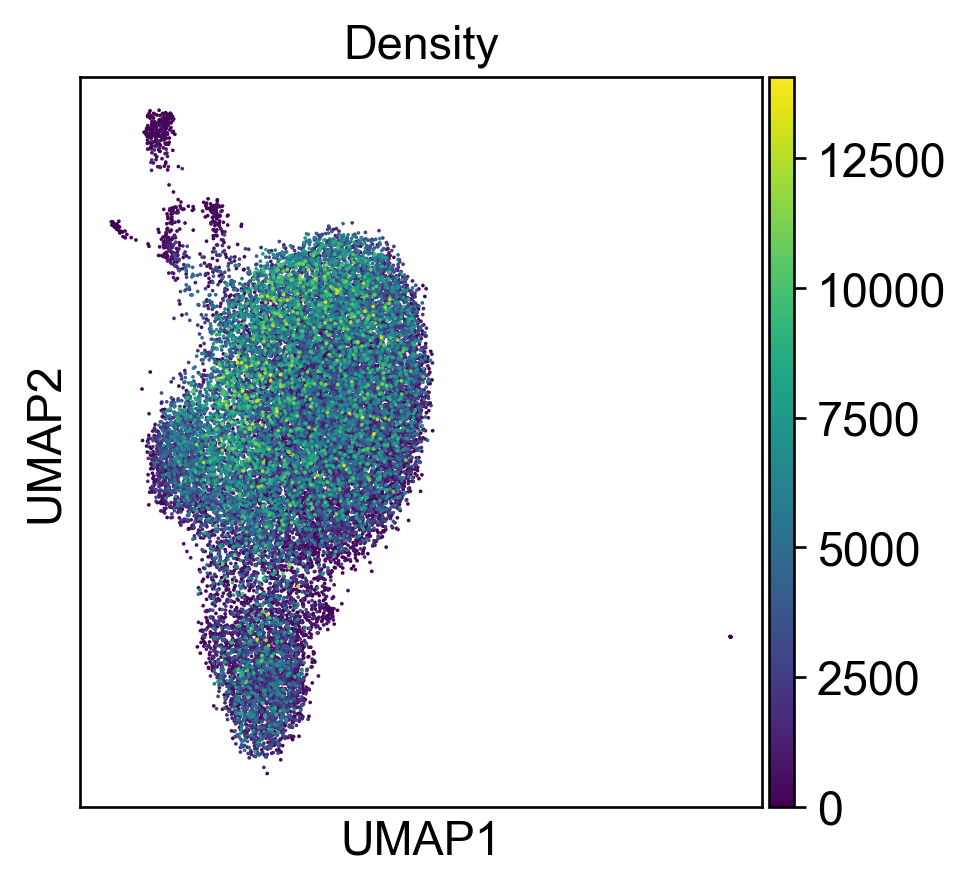

In [15]:
# lets try a smaller radius
adta_crinier.obs['Density'] = dens.get_density( radius=4.5) #set myeloid_adata 'Density' observation
sc.pl.umap(adta_crinier,color = 'Density') 
# i think this makes more sense, we are seing roungly two/three major local densities --> indicating the major subtypes

C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


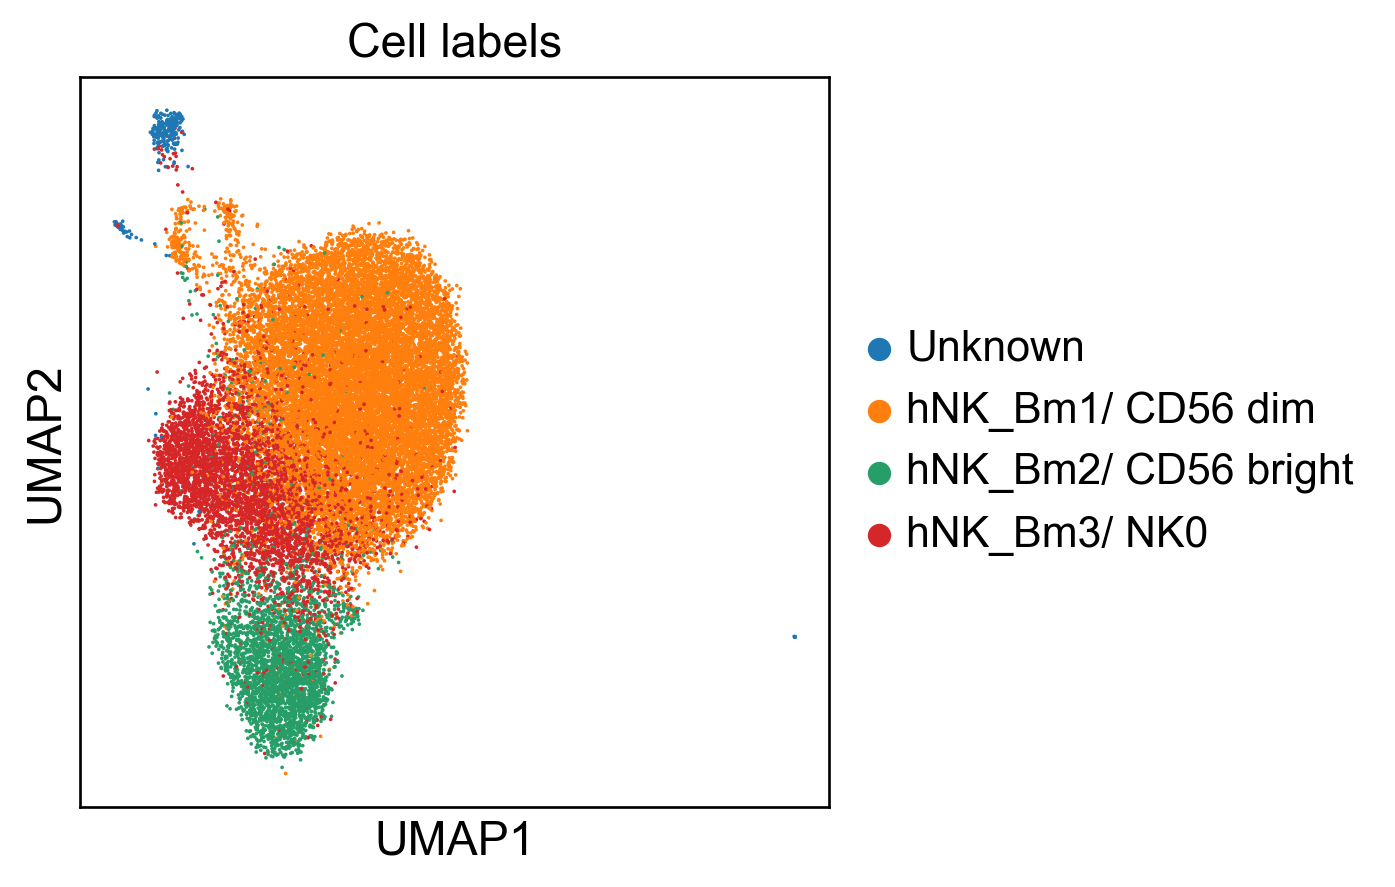

In [17]:
sc.pl.umap(adta_crinier,color = 'Cell labels') 

In [30]:
# setting don sampling parameters
# The noise variable controls which data points will be removed and 
# the target density is the desired density of output. 

noise = 8
# above, you're cutting off data points that fall in the lowest 8th percentile based on their 
# density value, considering them as noise.
target = 30 
# above, you're aiming to reduce the dataset to a size where the density of data points matches the 
# 20th percentile of the original data's density distribution. 
# This can help ensure that your data is not too sparse or too crowded, making it easier to analyze.

In [31]:
downed, downed_ind = pcreode.Down_Sample( leiden_rep, adta_crinier.obs['Density'], noise, target)

Number of data points in downsample = 9733


The target variable is used to cut down on high abundance cells in order to have a data cloud with relatively uniform distribution. A good rule of thumb is to set the target density until you have roughly 50% of the orginal data points in your downsampled dataset 

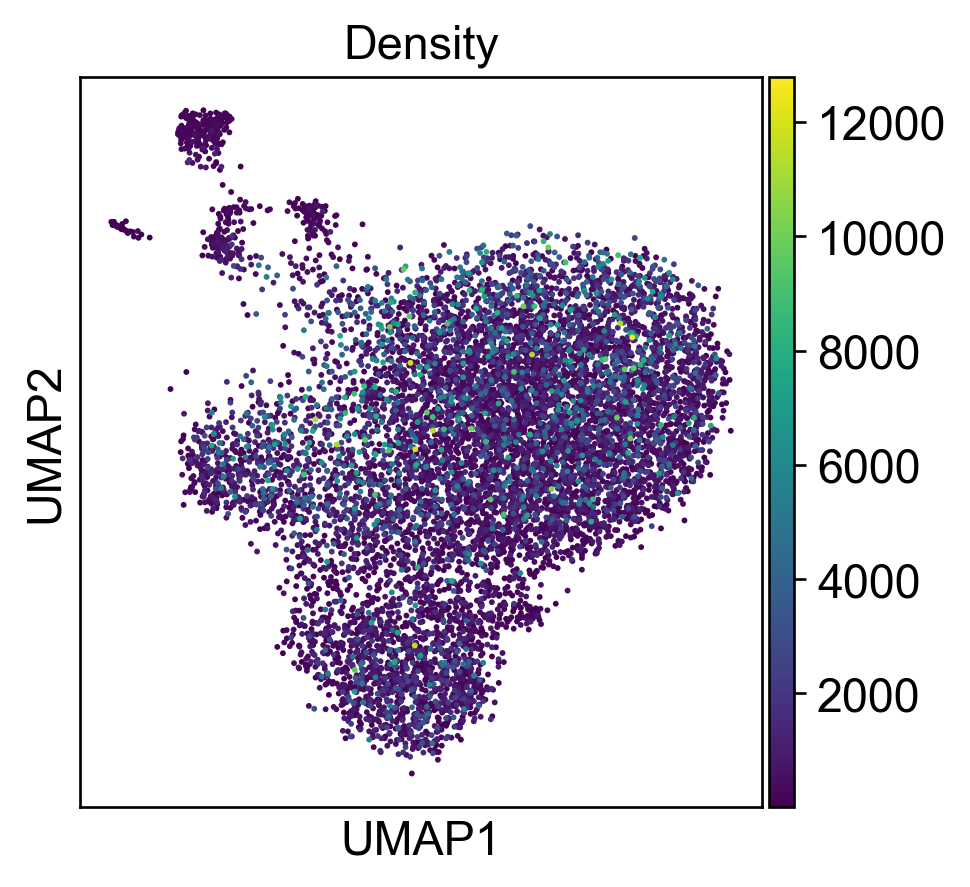

In [32]:
# you want only 50% of the original dataset and have all the outliers removed
sc.pl.umap(adta_crinier[downed_ind], color = 'Density') 

In [33]:
file_path = "C:/Users/hafsa/OneDrive - Imperial College London/PhD/Public datasets/pCreode/crinier_BM/" 

In [37]:
out_graph, out_ids = pcreode.pCreode(data=leiden_rep, 
                                         density=np.array(adta_crinier.obs['Density']), 
                                         noise=noise, 
                                         target=target, 
                                         file_path=file_path, 
                                         num_runs=50)
    # Optionally process or save your results here

Performing 50 independent runs, may take some time
Number of data points in downsample = 9852
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 16
hierarchical placing
consensus aligning
saving files for run_num 1
Number of data points in downsample = 9793
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 20
hierarchical placing
consensus aligning
saving files for run_num 2
Number of data points in downsample = 9818
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 18
hierarchical placing
consensus aligning
saving files for run_num 3
Number of data points in downsample = 9693
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 20
hierarchical placing
consensus aligning
saving files for run_num 4
Number of data points in downsample = 9768
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 22
hierarchical placing
consensus aligning
saving files for run_num 5
Number of data points in downsample = 9911
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 22
hierarchical placing
consensus aligning
saving files for run_num 6
Number of data points in downsample = 9819
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 20
hierarchical placing
consensus aligning
saving files for run_num 7
Number of data points in downsample = 9756
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 20
hierarchical placing
consensus aligning
saving files for run_num 8
Number of data points in downsample = 9752
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 20
hierarchical placing
consensus aligning
saving files for run_num 9
Number of data points in downsample = 9748
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 18
hierarchical placing
consensus aligning
saving files for run_num 10
Number of data points in downsample = 9847
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 22
hierarchical placing
consensus aligning
saving files for run_num 11
Number of data points in downsample = 9785
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 20
hierarchical placing
consensus aligning
saving files for run_num 12
Number of data points in downsample = 9802
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 22
hierarchical placing
consensus aligning
saving files for run_num 13
Number of data points in downsample = 9733
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 18
hierarchical placing
consensus aligning
saving files for run_num 14
Number of data points in downsample = 9805
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 20
hierarchical placing
consensus aligning
saving files for run_num 15
Number of data points in downsample = 9845
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 18
hierarchical placing
consensus aligning
saving files for run_num 16
Number of data points in downsample = 9812
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 18
hierarchical placing
consensus aligning
saving files for run_num 17
Number of data points in downsample = 9865
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 16
hierarchical placing
consensus aligning
saving files for run_num 18
Number of data points in downsample = 9887
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 18
hierarchical placing
consensus aligning
saving files for run_num 19
Number of data points in downsample = 9777
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 20
hierarchical placing
consensus aligning
saving files for run_num 20
Number of data points in downsample = 9774
Constructing density kNN
finding endstates


C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init

Number of endstates found -> 18
hierarchical placing


InternalError: Error at src/paths/bellman_ford.c:157: cannot run Bellman-Ford algorithm. -- Negative loop detected while calculating shortest paths

In [ ]:
# file_path = "C:/Users/hafsa/OneDrive - Imperial College London/PhD/Public datasets/pCreode/crinier_bm_3/" 

In [ ]:
# out_graph, out_ids = pcreode.pCreode(data=leiden_rep, 
#                                          density=np.array(adta_crinier.obs['Density']), 
#                                          noise=noise, 
#                                          target=target, 
#                                          file_path=file_path, 
#                                          num_runs=25)
#     # Optionally process or save your results here

In [38]:
graph_ranks = pcreode.pCreode_Scoring( data=leiden_rep, file_path=file_path, num_graphs=20)

scoring graph 1
scoring graph 2
scoring graph 3
scoring graph 4
scoring graph 5
scoring graph 6
scoring graph 7
scoring graph 8
scoring graph 9
scoring graph 10
scoring graph 11
scoring graph 12
scoring graph 13
scoring graph 14
scoring graph 15
scoring graph 16
scoring graph 17
scoring graph 18
scoring graph 19
Most representative graph IDs from first to worst [19 16  9 11 15 18 12  8  3 10 14  2  1  7 13 17  0  6  4  5]


In [39]:
gid = graph_ranks[0] # this will select the first graph ID in the ranking from above
print (gid)

19


In [40]:
analysis = pcreode.Analysis(file_path=file_path, graph_id=gid, data=leiden_rep, density=np.array(adta_crinier.obs['Density']), noise=noise)

In [41]:
seed = 3

In [42]:
'B3GAT1' in adta_crinier.var_names

True

In [43]:
data_raw = adta_crinier.X

In [44]:
data_raw_pd = pd.DataFrame(data_raw, columns = list(adta_crinier.var_names))

In [45]:
data_raw_pd

,AL669831.5,LINC00115,FAM41C,NOC2L,ISG15,C1orf159,TTLL10,TNFRSF18,TNFRSF4,SDF4,...,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AL592183.1,AC240274.1
0,0.000015,0.000010,0.000017,0.000098,0.000252,1.238992e-05,8.592639e-06,0.000100,0.000061,0.000308,...,0.001495,0.001971,0.001691,0.000427,0.001837,0.001099,0.000016,0.001715,0.000108,2.838410e-07
1,0.000072,0.000098,0.000004,0.000101,0.000133,6.714322e-05,2.465798e-06,0.000071,0.000028,0.000196,...,0.002054,0.002441,0.002205,0.000395,0.002425,0.001331,0.000042,0.002289,0.000024,2.679210e-06
2,0.000013,0.000006,0.000011,0.000101,0.000274,9.994660e-07,1.723568e-05,0.000048,0.000022,0.000246,...,0.001300,0.001632,0.001199,0.000105,0.001433,0.000662,0.000023,0.001273,0.000051,1.719867e-05
3,0.000030,0.000003,0.000018,0.000113,0.000246,1.234537e-06,5.004262e-07,0.000043,0.000008,0.000165,...,0.001525,0.001892,0.001379,0.000108,0.001666,0.000816,0.000056,0.001518,0.000036,1.067103e-05
4,0.000024,0.000009,0.000019,0.000102,0.000290,1.163818e-06,4.975481e-06,0.000132,0.000092,0.000252,...,0.001807,0.002096,0.001699,0.000167,0.002055,0.001127,0.000038,0.001841,0.000114,9.676237e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24291,0.000012,0.000046,0.000026,0.000086,0.000172,1.179843e-06,9.126758e-07,0.000172,0.000063,0.000221,...,0.001557,0.002286,0.001450,0.000285,0.002047,0.001054,0.000007,0.001886,0.000116,4.844698e-07
24292,0.000045,0.000002,0.000016,0.000062,0.000355,9.520345e-06,1.483269e-07,0.000120,0.000058,0.000268,...,0.001311,0.001851,0.001133,0.000238,0.001622,0.000983,0.000024,0.001509,0.000077,5.642586e-07
24293,0.000017,0.000003,0.000019,0.000117,0.000324,3.849644e-06,1.830089e-06,0.000081,0.000009,0.000139,...,0.001272,0.001848,0.001044,0.000130,0.001539,0.000753,0.000043,0.001377,0.000080,2.449950e-06
24294,0.000017,0.000007,0.000031,0.000072,0.000163,3.921492e-06,8.124479e-07,0.000181,0.000032,0.000126,...,0.001310,0.001891,0.001216,0.000223,0.001661,0.000917,0.000037,0.001509,0.000079,4.418667e-06


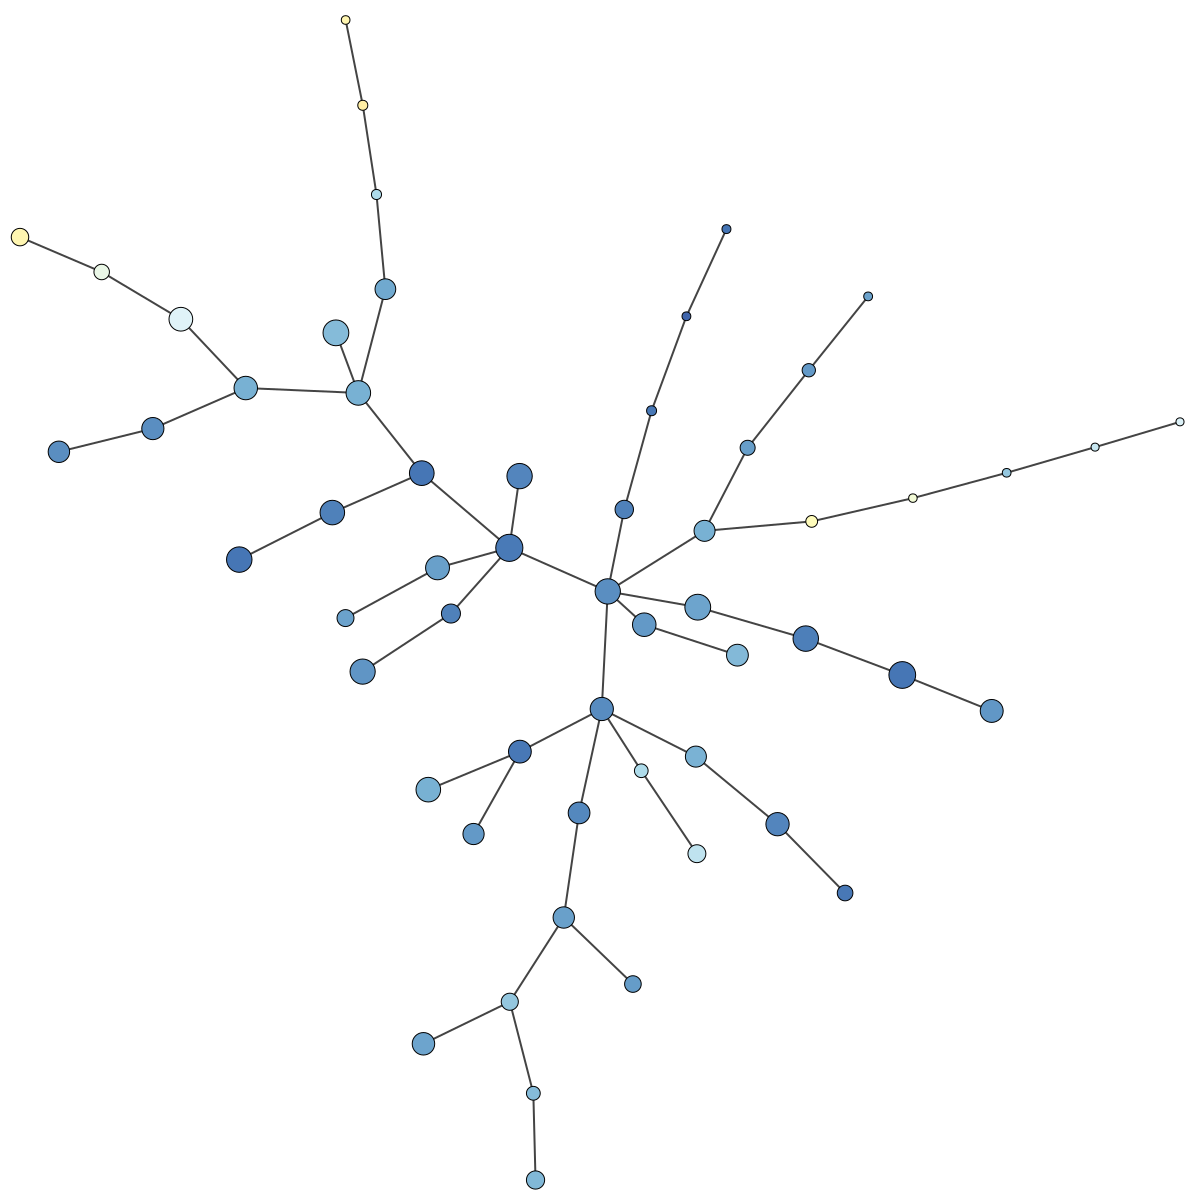

In [46]:
analysis.plot_save_graph(seed=seed, overlay=data_raw_pd['CD44'], file_out='CD44', upper_range=1.25)

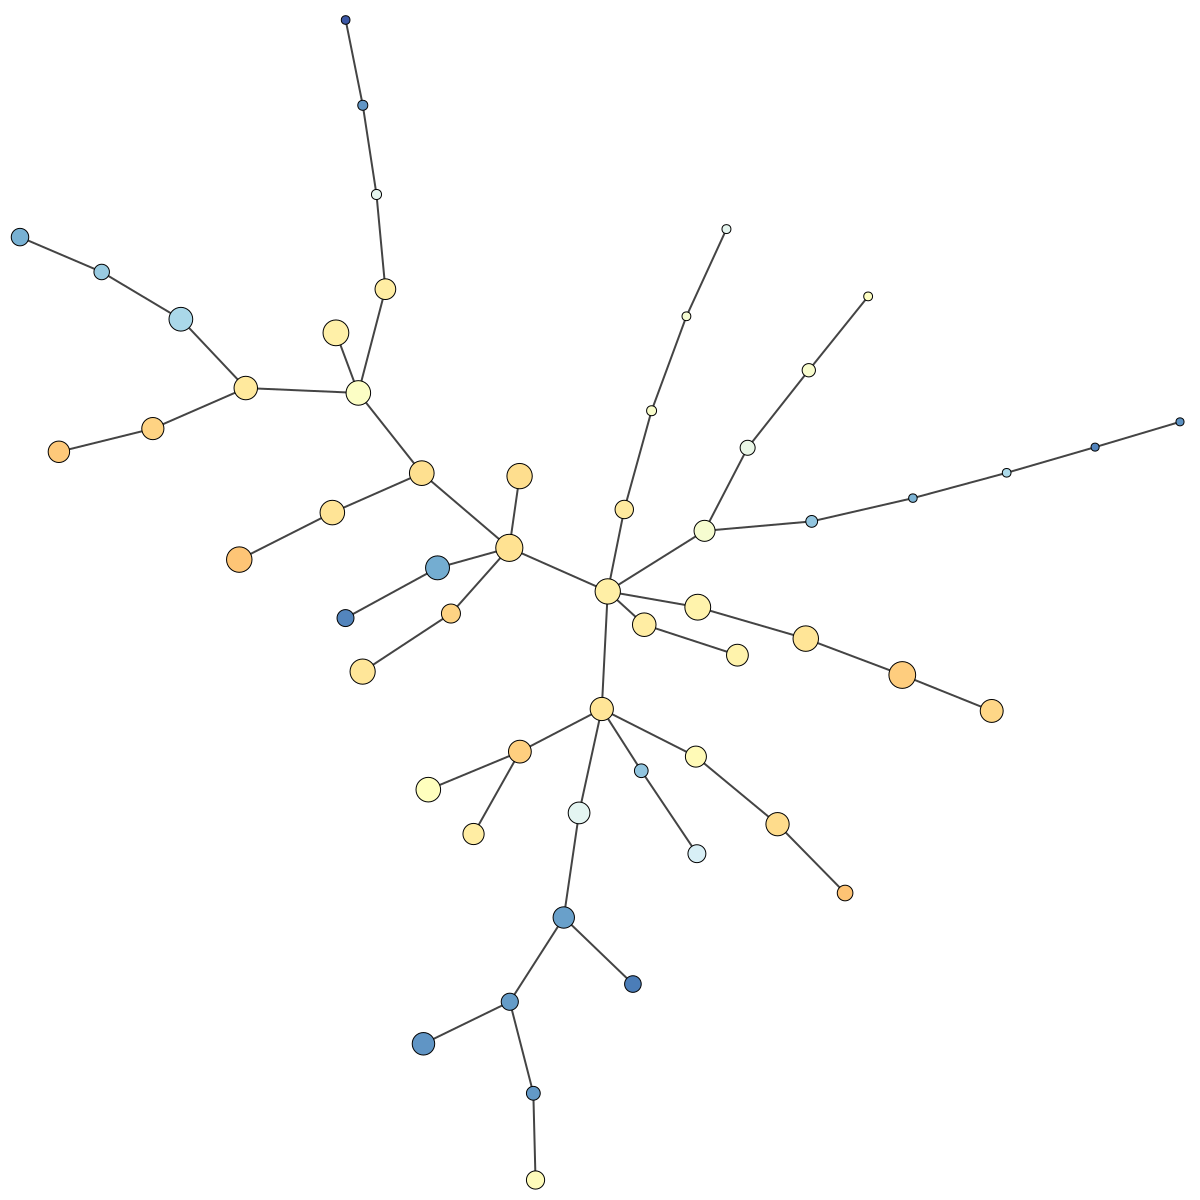

In [47]:
analysis.plot_save_graph(seed=seed, overlay=data_raw_pd['GZMB'], file_out='GZMB', upper_range=1.25)

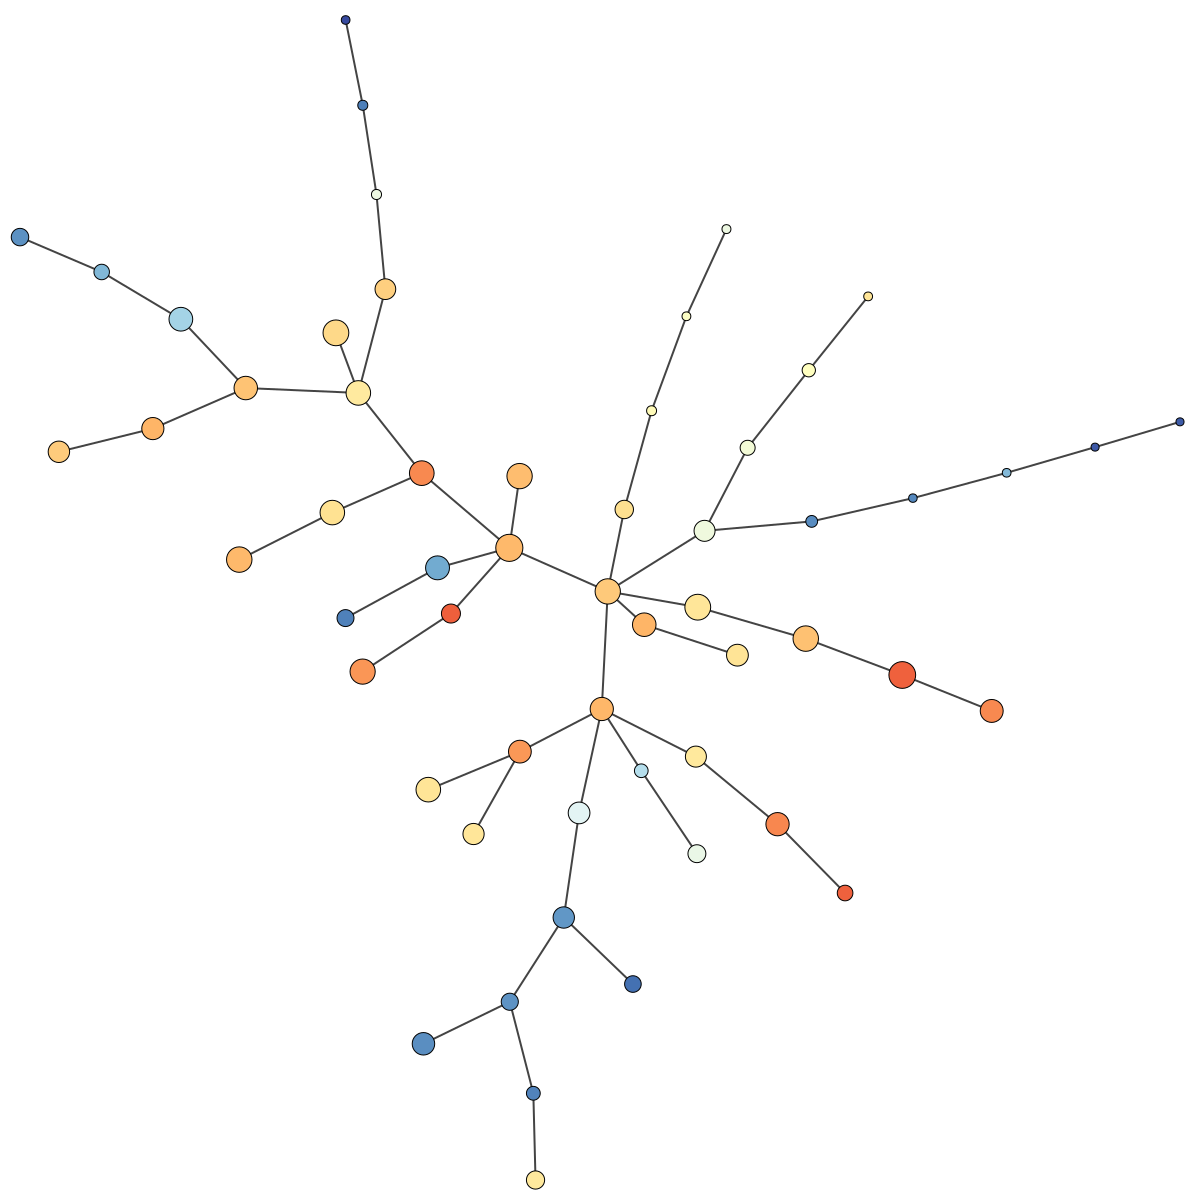

In [48]:
analysis.plot_save_graph(seed=seed, overlay=data_raw_pd['FCGR3A'], file_out='FCGR3A', upper_range=1.25)

In [49]:
labels = []
for i in adta_crinier.obs['Cell labels']:
    if i == 'Unknown':
        labels.append(1)
    elif i == 'hNK_Bm1/ CD56 dim':
        labels.append(2)
    elif i == 'hNK_Bm2/ CD56 bright':
        labels.append(3)
    elif i == 'hNK_Bm3/ NK0':
        labels.append(4)

In [50]:
data_raw_pd['labels'] = labels

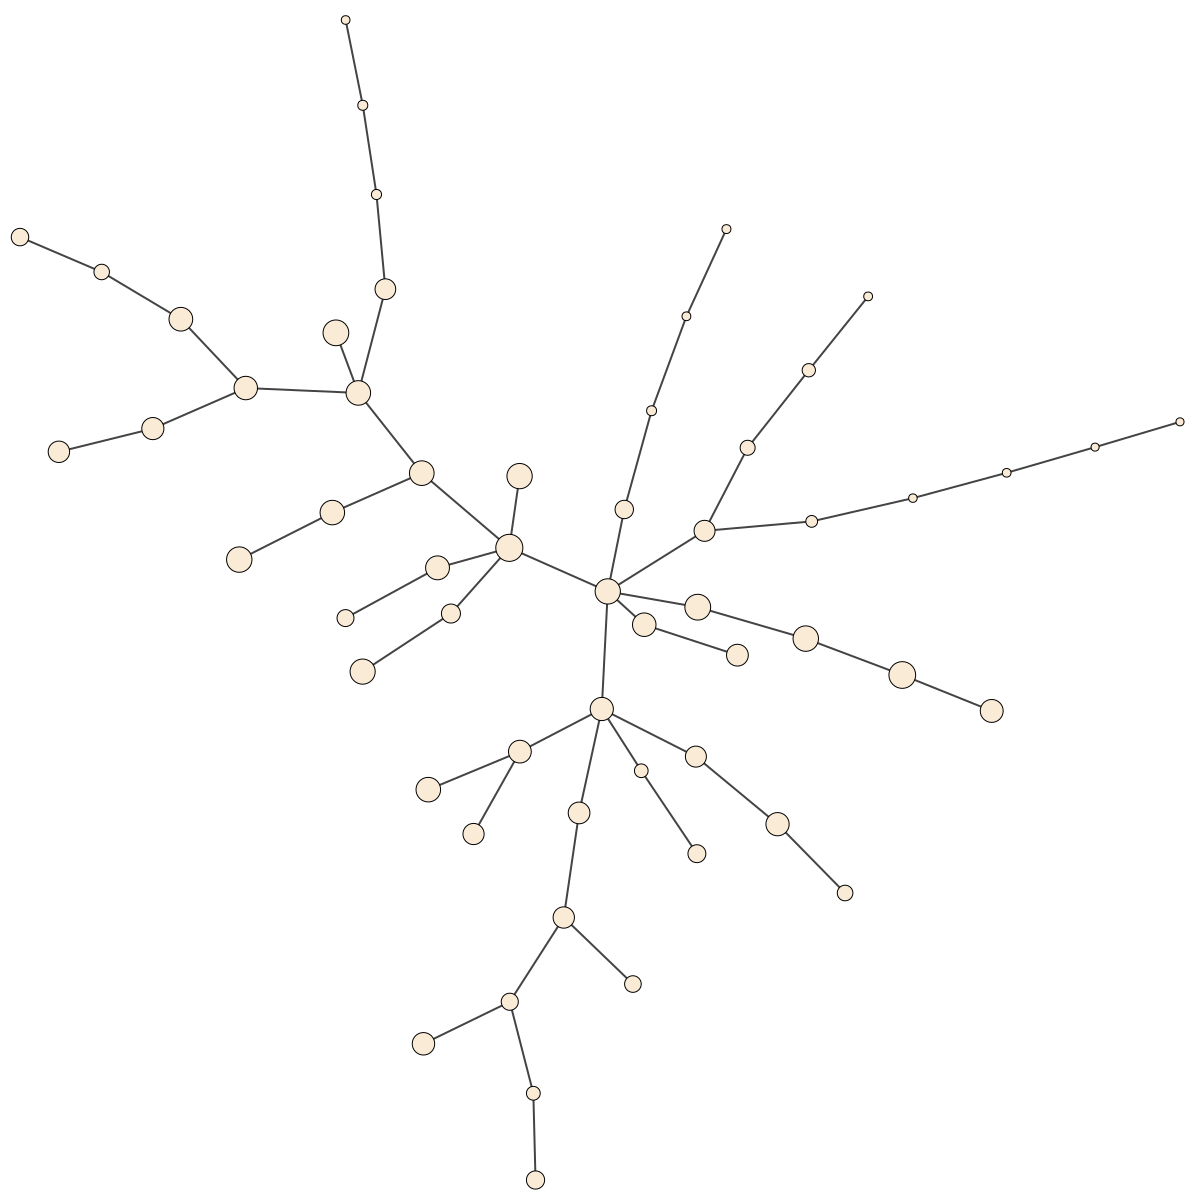

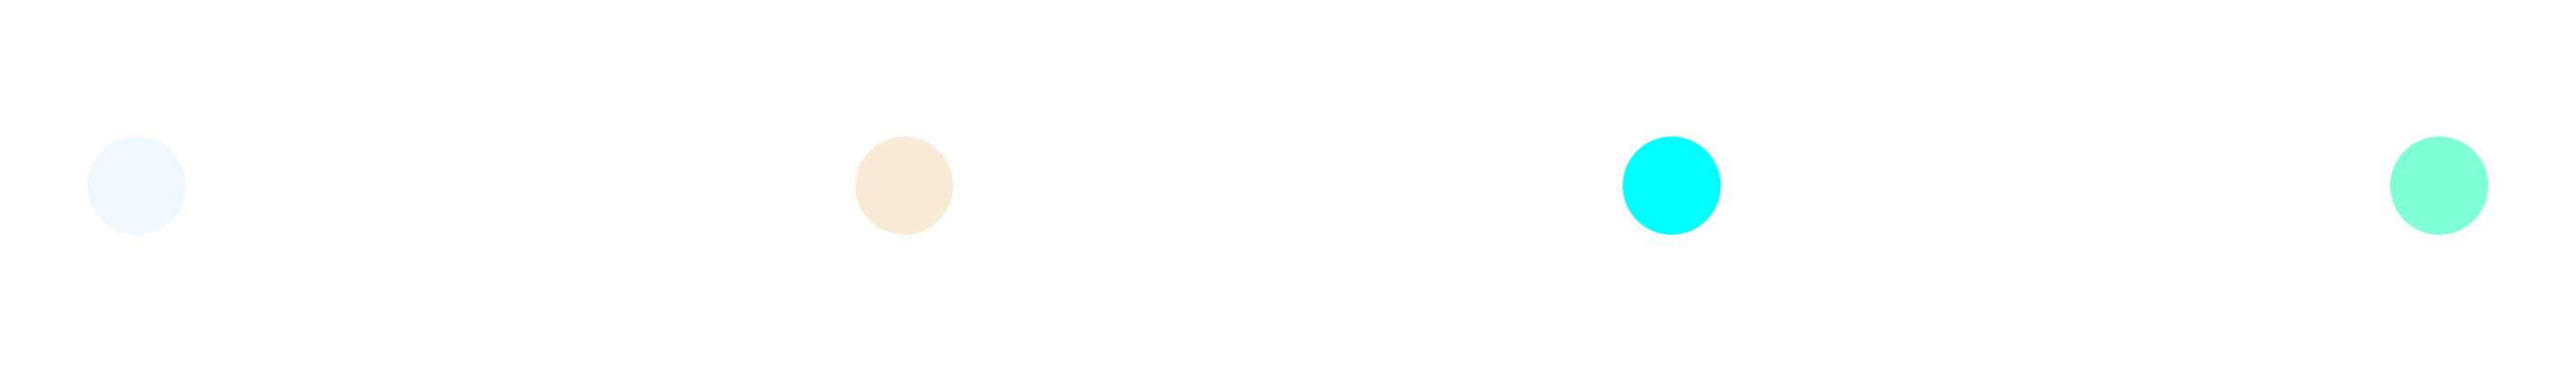

In [51]:
analysis.plot_save_qual_graph(seed=7, overlay= np.array(labels).astype(str), file_out='4_clusters_overlay')

C:\Users\hafsa\.conda\envs\pCreode_env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


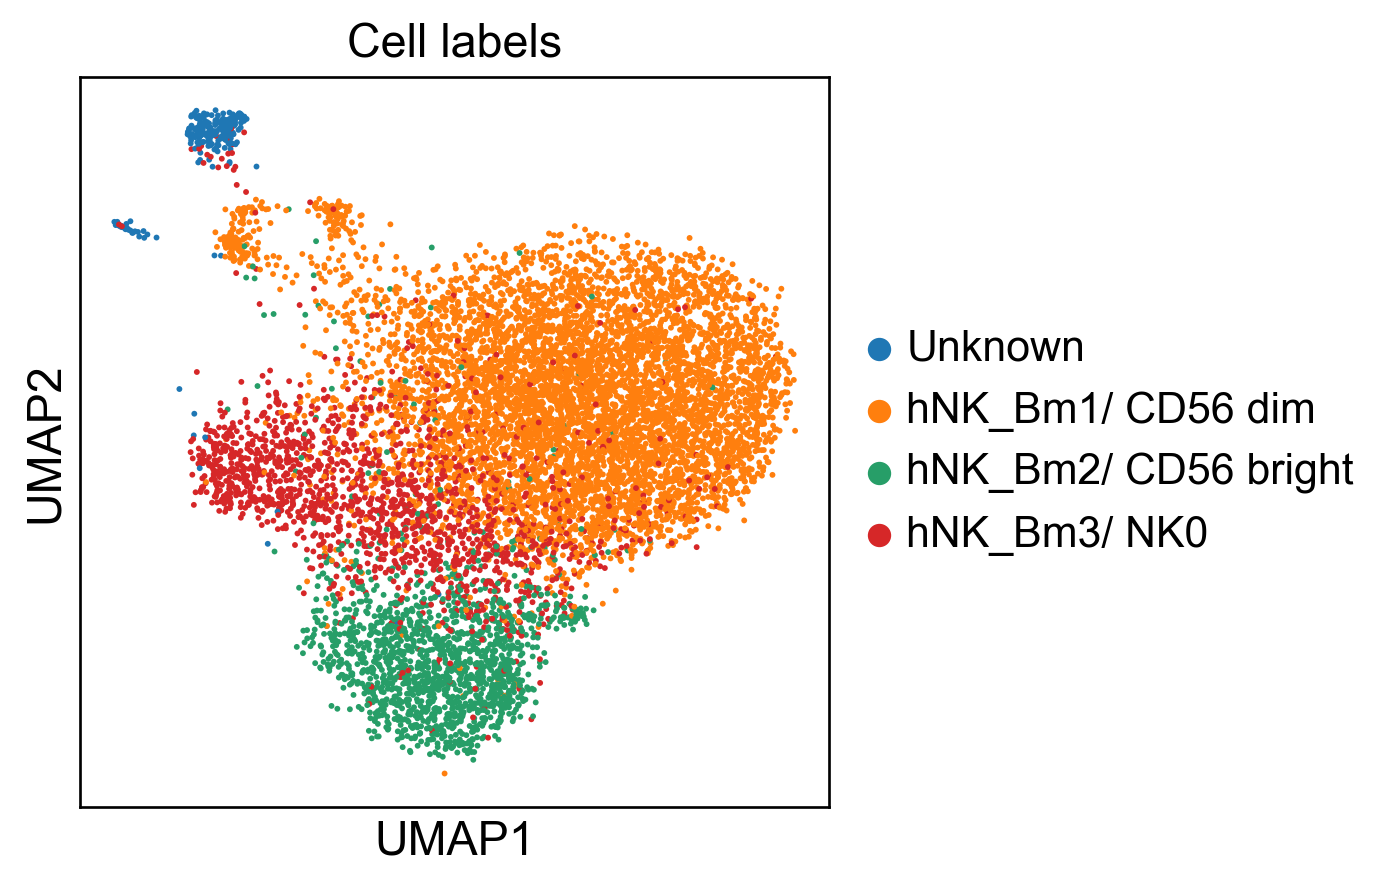

In [52]:
sc.pl.umap(adta_crinier[downed_ind], color = 'Cell labels') 

In [53]:
adta_crinier[downed_ind]

View of AnnData object with n_obs × n_vars = 9733 × 12049
    obs: 'Sample', 'Study', 'Sequencing_depth', 'Organ', 'Cell labels', '_scvi_batch', '_scvi_labels', 'leiden', 'Density'
    uns: 'Cell labels_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'scVI normalised'
    obsp: 'connectivities', 'distances'